<a href="https://colab.research.google.com/github/dWanderingSoul/Customers-Purchase-History-K-MEANS-CLUSTERING-ALGORITHM-/blob/main/Customers'_Purchase_History_K_MEANS_CLUSTERING_ALGORITHM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')


In [5]:
# Check for missing values and handle them (e.g., fill or drop)
data = data.dropna()

# Normalize the data using MinMaxScaler or StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select the features to be used for clustering
features = ['Spending Score (1-100)', 'Annual Income (k$)','Age']  # Changed to existing columns

# Scale the features
data_scaled = scaler.fit_transform(data[features])


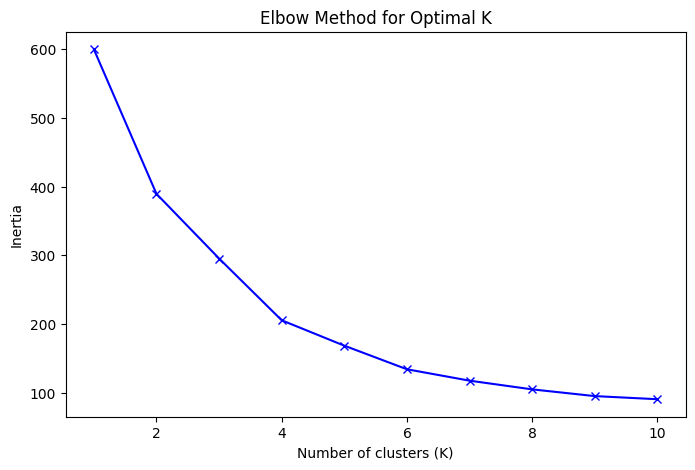

In [6]:
# Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [7]:
# Apply K-means with the optimal K (e.g., 4 clusters)
kmeans = KMeans(n_clusters=4)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset


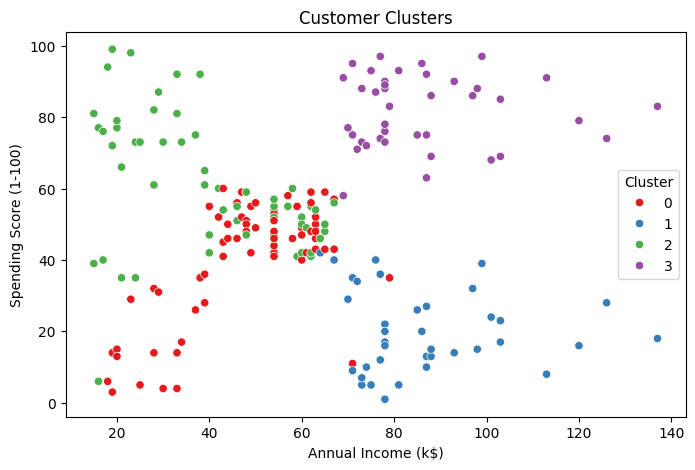

In [9]:
# Visualizing the clusters (example for 2 features)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set1')
plt.title('Customer Clusters')
plt.show()


In [11]:
# Analyze cluster statistics
cluster_summary = data.groupby('Cluster')[['Spending Score (1-100)', 'Annual Income (k$)','Age']].mean() # Select only numeric columns
print(cluster_summary)

         Spending Score (1-100)  Annual Income (k$)        Age
Cluster                                                       
0                     39.969231           47.707692  53.984615
1                     19.578947           86.500000  39.368421
2                     60.298246           40.000000  25.438596
3                     81.525000           86.100000  32.875000


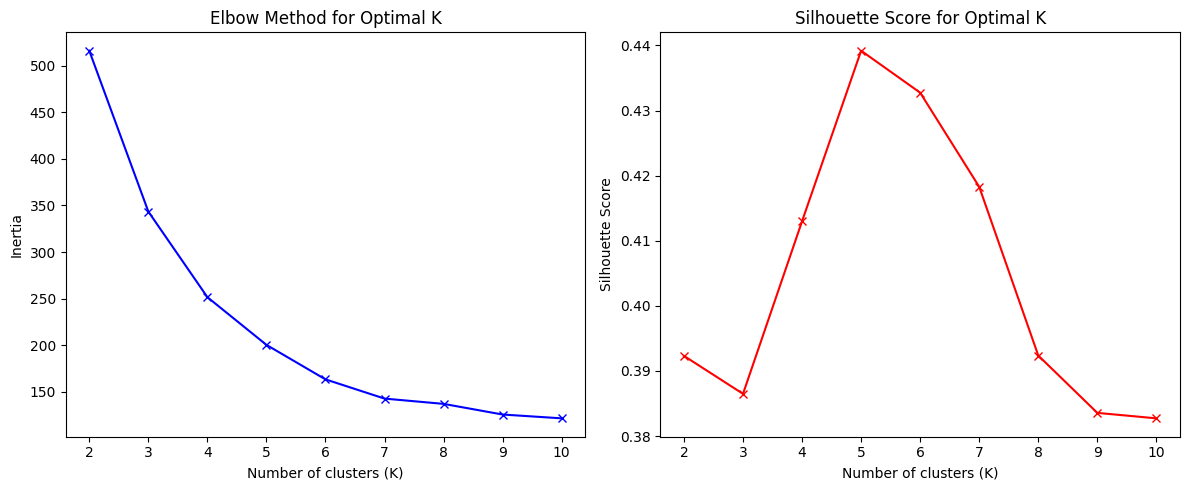

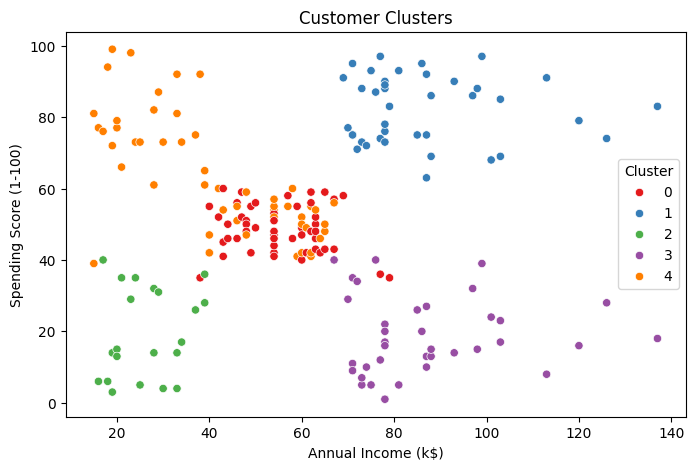

         Spending Score (1-100)  Annual Income (k$)        Age  TotalSpending
Cluster                                                                      
0                     48.640000           55.320000  54.820000      26.805800
1                     82.128205           86.538462  32.692308      71.014103
2                     19.380952           26.285714  45.523810       5.271905
3                     18.297297           86.945946  39.702703      16.019459
4                     62.660377           41.547170  25.075472      24.156981


In [12]:
!pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score



# Assuming 'data' is your DataFrame
# ... (your existing code for data loading and preprocessing) ...


# --- Feature Engineering ---
# Example: Add a new feature 'TotalSpending'
# (You can replace this with your own relevant features)
data['TotalSpending'] = data['Spending Score (1-100)'] * data['Annual Income (k$)'] / 100


# --- Feature Selection ---
# Select the features for clustering
features = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age', 'TotalSpending']

# --- Scaling ---
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])


# --- K-Means with K-Means++ Initialization ---
# Elbow method for optimal K
inertia = []
silhouette_scores = []  # To store Silhouette scores for each K
K = range(2, 11)  # Check a wider range of K values

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)  # Use K-means++
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

    # Calculate Silhouette Score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_scaled, labels))


# --- Elbow Method Plot ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')


# --- Silhouette Score Plot ---
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.tight_layout()
plt.show()


# --- Choose optimal K and apply K-Means ---
optimal_k = 5  # Example: Choose K based on the Elbow and Silhouette plots
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)


# --- Visualization ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set1')
plt.title('Customer Clusters')
plt.show()


# --- Cluster Analysis ---
cluster_summary = data.groupby('Cluster')[features].mean()  # Analyze means of features
print(cluster_summary)
